In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import collections

## part 1 ##

In [2]:
puzzlelines = pathlib.Path('day24.txt').read_text().splitlines()

In [3]:
inplines = []
for i,line in enumerate(puzzlelines):
    if 'inp' in line:
        inplines.append(i)
inplines

[0, 18, 36, 54, 72, 90, 108, 126, 144, 162, 180, 198, 216, 234]

In [4]:
stanzas = {}
stanza_length = 18
for i, inpline in enumerate(inplines):
    stanzas[i] = puzzlelines[inpline:inpline+stanza_length]
    

In [5]:
ref_stanza = stanzas[0]
ref_stanza

['inp w',
 'mul x 0',
 'add x z',
 'mod x 26',
 'div z 1',
 'add x 12',
 'eql x w',
 'eql x 0',
 'mul y 0',
 'add y 25',
 'mul y x',
 'add y 1',
 'mul z y',
 'mul y 0',
 'add y w',
 'add y 4',
 'mul y x',
 'add z y']

In [6]:
not_the_same = {}
for i, line in enumerate(ref_stanza):
    cmplines = [stanzas[j][i] for j in range(len(stanzas))]
    if all(cmpline == line for cmpline in cmplines):
        continue
    not_the_same[i] = cmplines

In [7]:
not_the_same

{4: ['div z 1',
  'div z 1',
  'div z 1',
  'div z 26',
  'div z 1',
  'div z 26',
  'div z 1',
  'div z 1',
  'div z 26',
  'div z 1',
  'div z 26',
  'div z 26',
  'div z 26',
  'div z 26'],
 5: ['add x 12',
  'add x 15',
  'add x 11',
  'add x -14',
  'add x 12',
  'add x -10',
  'add x 11',
  'add x 13',
  'add x -7',
  'add x 10',
  'add x -2',
  'add x -1',
  'add x -4',
  'add x -12'],
 15: ['add y 4',
  'add y 11',
  'add y 7',
  'add y 2',
  'add y 11',
  'add y 13',
  'add y 9',
  'add y 12',
  'add y 6',
  'add y 2',
  'add y 11',
  'add y 12',
  'add y 3',
  'add y 13']}

In [8]:
divzs = [int(line.split()[2]) for line in not_the_same[4]]
addxs = [int(line.split()[2]) for line in not_the_same[5]]
addys = [int(line.split()[2]) for line in not_the_same[15]]
divzs

[1, 1, 1, 26, 1, 26, 1, 1, 26, 1, 26, 26, 26, 26]

In [9]:
addxs

[12, 15, 11, -14, 12, -10, 11, 13, -7, 10, -2, -1, -4, -12]

In [10]:
addys

[4, 11, 7, 2, 11, 13, 9, 12, 6, 2, 11, 12, 3, 13]

$$
\require{cases}
$$

Each digit has the same processing, except for lines 4, 5, and 15 (indexing from 0):

    inp w
    mul x 0
    add x z
    mod x 26
    div z [1, 1, 1, 26, 1, 26, 1, 1, 26, 1, 26, 26, 26, 26]
    add x [12, 15, 11, -14, 12, -10, 11, 13, -7, 10, -2, -1, -4, -12]
    eql x w
    eql x 0
    mul y 0
    add y 25
    mul y x
    add y 1
    mul z y
    mul y 0
    add y w
    add y [4, 11, 7, 2, 11, 13, 9, 12, 6, 2, 11, 12, 3, 13]
    mul y x
    add z y

w, x, y, and z are set to zero for the first run digit input. After the first digit, the non-w
registers have whatever value is left over from the previous digit. In reality, though, x and y are
cleared to 0 before being used, so the only register that persists is z.

    inp w <-- set digit w from input

    mul x 0 <-- x is cleared to 0, so doesn't depend on previous stanza
    add x z
    mod x 26 <-- set x to z_prev%26

    div z z* <-- set z to z_prev//z*, where z* depends on which stanza is being run

So, at this point: $z_j = z_{j-1}//z^*_j$ and $x_j = z_{j-1}%26$.

    add x x*
    eql x w
    eql x 0 <-- 1 if w == z_prev%26 + x*, and 0 if w != z_prev%26 + x*
    
$x = \begin{cases} 0, & z_{j-1}\% 26 = w - x^*_j \\ 1, & z_{j-1}\% 26 \neq w - x^*_j \end{cases} $

    mul y 0 <-- y is cleared, so doesn't depend on previous stanza
    add y 25
    mul y x
    add y 1 <-- y = 25*x + 1, so y = 1 if w == z_prev%26 + x*, and y = 26 if w != z_prev%26 + x*

$y = \begin{cases} 1, & z_{j-1}\% 26 = w - x^*_j \\ 26, & z_{j-1}\% 26 \neq w - x^*_j \end{cases} $

    mul z y <-- z is unchanged if w == z_prev%26 + x*, and z is multiplied by 26 if w != z_prev%26 + x*

$z_j = \begin{cases} z_{j-1}//z^*_j, & z_{j-1}\% 26 = w - x^*_j \\ 
                     26\cdot(z_{j-1}//z^*_j), & z_{j-1}\% 26 \neq w - x^*_j \end{cases} $

    mul y 0 <-- clear y to 0
    add y w
    add y y*
    mul y x
    add z y <-- z is unchanged if w == z%26 + x*, z += w + y* if w != z%26 + x*

$z_j = \begin{cases} z_{j-1}//z^*_j, & z_{j-1}\% 26 = w - x^*_j \\ 
                     26\cdot(z_{j-1}//z^*_j) + w + y^*_j, & z_{j-1}\% 26 \neq w - x^*_j \end{cases} $



In [11]:
def run_stanza(w, zprev, j):
    z = zprev//divzs[j]
    if w == zprev%26 + addxs[j]:
        return z
    z *= 26
    z += w + addys[j]
    return z

In [12]:
def full_run(digits):
    z = 0
    for j, w in enumerate(digits):
        z = run_stanza(w, z, j)
    return z

Text(0.5, 1.0, 'Last digit')

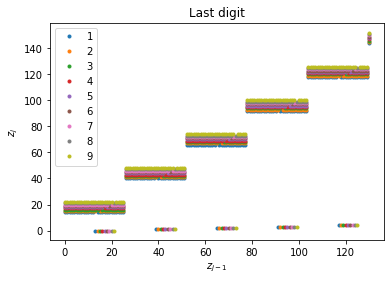

In [13]:
fig,ax = plt.subplots()
for w in range(1,10):
    zprevs = range(0, 131)
    ax.plot(zprevs, [run_stanza(w, zprev, 13) for zprev in zprevs], '.', label=w)
plt.legend()
ax.set_xlabel(r'$z_{j-1}$')
ax.set_ylabel('$z_j$')
ax.set_title('Last digit')

Thinking is hard. How about we just brute-force it?  Starting w/ z=0, what values of z are possible for each digit? That's likely to be far less than $9^{14}$.

In [14]:
zvals = collections.defaultdict(set)
zvals[0] = set([run_stanza(w, 0, 0) for w in range(1,10)])
for digit in range(1, 14):
    zvals[digit] = set([run_stanza(w, zprev, digit) for w in range(1, 10) for zprev in zvals[digit-1]])
    print(digit, len(zvals[digit]))

1 81
2 729
3 810
4 7290
5 8100
6 72900
7 656100
8 703728
9 6333552
10 6733044
11 6394302
12 6626691
13 6401629


Now work backwards. What previous values of z for the last digit will give me 0?

In [15]:
for w in range(1, 10):
    for zprev in zvals[12]:
        if run_stanza(w, zprev, 13) == 0:
            print(w, zprev)

1 13


Similarly for the penultimate digit, only now the z I want is the one that will give me 0 for the next digit.

In [16]:
for w in range(1, 10):
    for zprev in zvals[11]:
        if run_stanza(w, zprev, 12) == 13:
            print(w, zprev)

8 350
9 351


Here there are two possible values of w that have an associated value of z that would work.
We want the biggest number, so pick the larger value of w.

In [17]:
for w in range(1, 10):
    for zprev in zvals[10]:
        if run_stanza(w, zprev, 11) == 351:
            print(w, zprev)

9 9136


Okay, it's slow, but doable, to do this for all of the digits.

In [18]:
maxvals = []
next_z = 0
for digit in reversed(range(1, 14)):
    valid = collections.defaultdict(int)
    for w in range(1, 10):
        for zprev in zvals[digit-1]:
            if run_stanza(w, zprev, digit) == next_z:
                valid[w] = zprev
    print(digit, valid)
    maxdig = max(valid.keys())
    maxvals.append(maxdig)
    next_z = valid[maxdig]
for w in range(1, 10):
    if run_stanza(w, 0, 0) == next_z:
        w0 = w
        break
maxvals.append(w0)

13 defaultdict(<class 'int'>, {1: 13})
12 defaultdict(<class 'int'>, {8: 350, 9: 351})
11 defaultdict(<class 'int'>, {9: 9136})
10 defaultdict(<class 'int'>, {1: 237539, 2: 237540, 3: 237541, 4: 237542, 5: 237543, 6: 237544, 7: 237545, 8: 237546, 9: 237547})
9 defaultdict(<class 'int'>, {9: 9136})
8 defaultdict(<class 'int'>, {6: 237549, 7: 237550, 8: 237551, 9: 237552})
7 defaultdict(<class 'int'>, {4: 9136})
6 defaultdict(<class 'int'>, {1: 351})
5 defaultdict(<class 'int'>, {2: 9138, 3: 9139, 4: 9140, 5: 9141, 6: 9142, 7: 9143, 8: 9144, 9: 9145})
4 defaultdict(<class 'int'>, {8: 351})
3 defaultdict(<class 'int'>, {1: 9141, 2: 9142})
2 defaultdict(<class 'int'>, {9: 351})
1 defaultdict(<class 'int'>, {2: 13})


In [19]:
full_run(reversed(maxvals))

0

In [20]:
''.join(str(i) for i in reversed(maxvals + [w0]))

'992928914999991'

## part 2 ##

In [21]:
minvals = []
next_z = 0
for digit in reversed(range(1, 14)):
    valid = collections.defaultdict(int)
    for w in range(1, 10):
        for zprev in zvals[digit-1]:
            if run_stanza(w, zprev, digit) == next_z:
                valid[w] = zprev
    print(digit, valid)
    mindig = min(valid.keys())
    minvals.append(mindig)
    next_z = valid[mindig]
for w in range(1, 10):
    if run_stanza(w, 0, 0) == next_z:
        w0 = w
        break
minvals.append(w0)
print(reversed(minvals))

13 defaultdict(<class 'int'>, {1: 13})
12 defaultdict(<class 'int'>, {8: 350, 9: 351})
11 defaultdict(<class 'int'>, {9: 9110})
10 defaultdict(<class 'int'>, {1: 236863, 2: 236864, 3: 236865, 4: 236866, 5: 236867, 6: 236868, 7: 236869, 8: 236870, 9: 236871})
9 defaultdict(<class 'int'>, {1: 9110})
8 defaultdict(<class 'int'>, {6: 236873, 7: 236874, 8: 236875, 9: 236876})
7 defaultdict(<class 'int'>, {1: 9110})
6 defaultdict(<class 'int'>, {1: 350})
5 defaultdict(<class 'int'>, {2: 9112, 3: 9113, 4: 9114, 5: 9115, 6: 9116, 7: 9117, 8: 9118, 9: 9119})
4 defaultdict(<class 'int'>, {1: 350})
3 defaultdict(<class 'int'>, {1: 9115, 2: 9116})
2 defaultdict(<class 'int'>, {8: 350})
1 defaultdict(<class 'int'>, {1: 13})


In [22]:
''.join(str(c) for c in reversed(minvals))

'91811211611981'

In [23]:
full_run(reversed(minvals))

0